In [ ]:
!git clone https://github.com/akTwelve/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
# Sample image
!wget -O image.jpg https://github.com/Anant-mishra1729/Deep-learning/blob/main/Mask_RCNN/image.jpg?raw=true

--2024-06-17 11:25:06--  https://github.com/Anant-mishra1729/Deep-learning/blob/main/Mask_RCNN/image.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Anant-mishra1729/Machine-Learning-Notebooks/blob/main/Mask_RCNN/image.jpg?raw=true [following]
--2024-06-17 11:25:06--  https://github.com/Anant-mishra1729/Machine-Learning-Notebooks/blob/main/Mask_RCNN/image.jpg?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Anant-mishra1729/Machine-Learning-Notebooks/raw/main/Mask_RCNN/image.jpg [following]
--2024-06-17 11:25:06--  https://github.com/Anant-mishra1729/Machine-Learning-Notebooks/raw/main/Mask_RCNN/image.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.github

Sample image used in this tutorial https://unsplash.com/photos/3yd8oXGoLqM

You can use any other sample image too

In [ ]:
import os
import sys
import skimage.io
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
%matplotlib inline

# Root directory of the project
ROOT_DIR = "Mask_RCNN"

# Import Mask RCNN
# We will need this to
sys.path.append(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

IMAGE_PATH = "image.jpg"

In [ ]:
# For importing coco folder as module
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Loading the model configuration
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

import tensorflow as tf

tf.keras.Model.load_weights(model.keras_model, COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead


In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
!python -m pip uninstall numpy

Found existing installation: numpy 1.23.1
Uninstalling numpy-1.23.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.1


In [ ]:
!python -m pip install numpy==1.23.1

  Using cached numpy-1.23.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


In [ ]:
!pip3 install mxnet-mkl==1.6.0 numpy==1.23.1


Processing 1 images
image                    shape: (1282, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


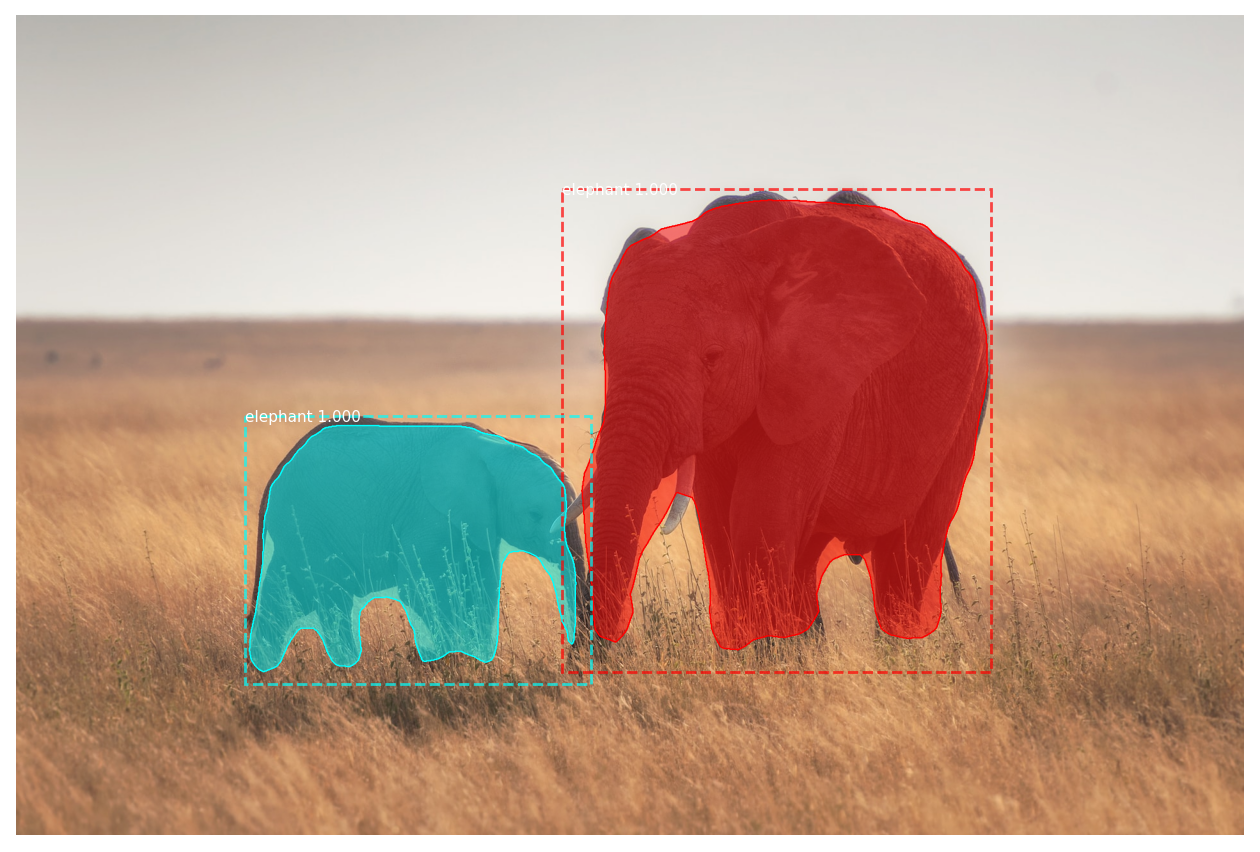

In [ ]:
# Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread("/content/image.jpg")

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])

In [ ]:
def convertCoords(coords):
  # Input : (y1, x1, y2, x2)
  y1, x1, y2, x2 = coords
  width,height = x2 - x1, y2 - y1
  return (x1, y1, width, height)

In [ ]:
def separateEntities(r):
  masks = [r['masks'][:,:,i].astype("uint8") for i in range(len(r['class_ids']))]
  rects = [(convertCoords(roi)) for roi in r['rois']]
  return masks,rects
masks, rects = separateEntities(r)

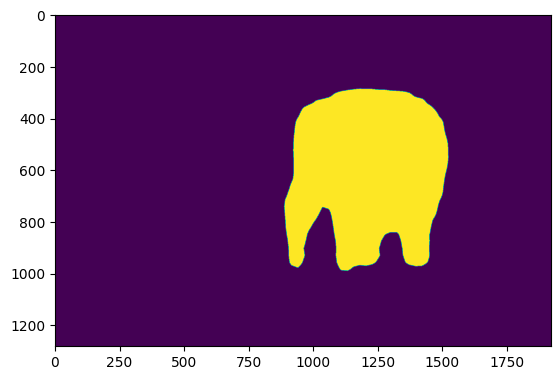

In [ ]:
plt.imshow(masks[0])

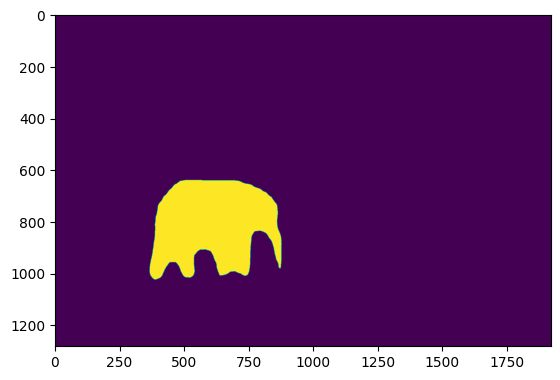

In [ ]:
plt.imshow(masks[1])

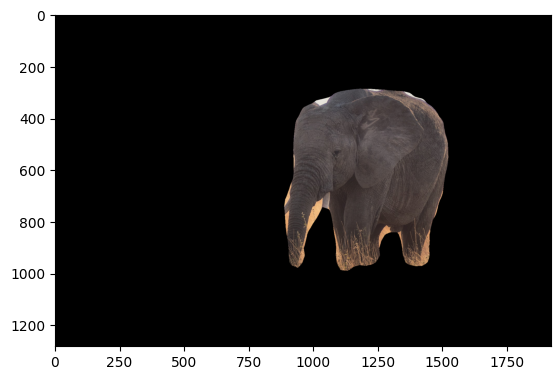

In [ ]:
plt.imshow(cv2.bitwise_and(image,image,mask = (r['masks'][:,:,0].astype("uint8"))))

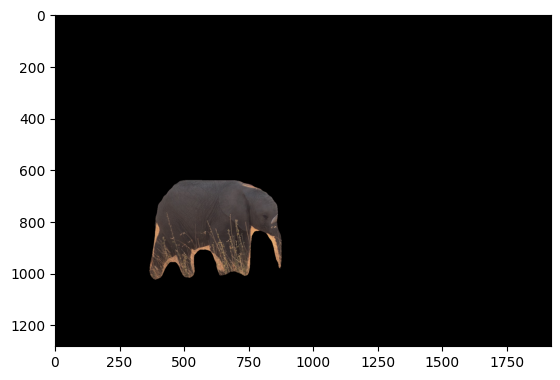

In [ ]:
plt.imshow(cv2.bitwise_and(image,image,mask = (r['masks'][:,:,1].astype("uint8"))))

In [ ]:
def applyGrabCut(image,mask,rect,iters):
  fgModel = np.zeros((1, 65), dtype="float")
  bgModel = np.zeros((1, 65), dtype="float")

  # apply GrabCut using the the bounding box segmentation method
  (mask_grab, bgModel, fgModel) = cv2.grabCut(image, mask, rect, bgModel,
    fgModel, iterCount=iters, mode=cv2.GC_INIT_WITH_RECT)

  values = (
    ("Definite Background", cv2.GC_BGD),
    ("Probable Background", cv2.GC_PR_BGD),
    ("Definite Foreground", cv2.GC_FGD),
    ("Probable Foreground", cv2.GC_PR_FGD),
  )
  valueMasks = {}
  for name,value in values:
    valueMasks[name] = (mask_grab == cv2.GC_PR_FGD).astype("uint8") * 255

  return valueMasks

In [ ]:
vm1 = applyGrabCut(image,masks[0],rects[0],10)

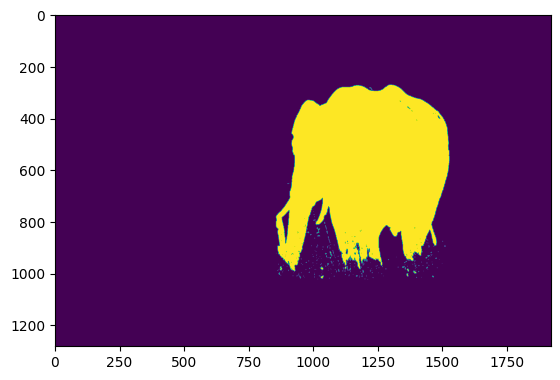

In [ ]:
plt.imshow(vm1['Probable Foreground'])

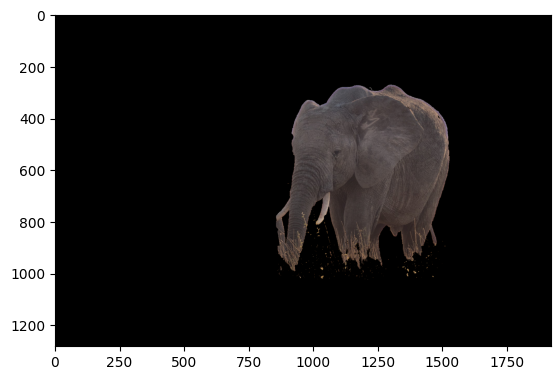

In [ ]:
mother = cv2.bitwise_and(image,image,mask = vm1['Definite Foreground'])
plt.imshow(mother)

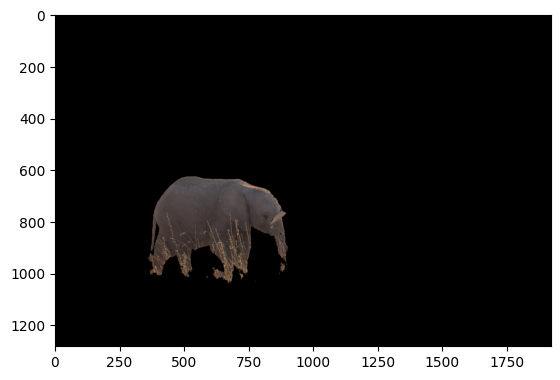

In [ ]:
vm2 = applyGrabCut(image,masks[1],rects[1],10)
child = cv2.bitwise_and(image,image,mask = vm2['Definite Foreground'])
plt.imshow(child)

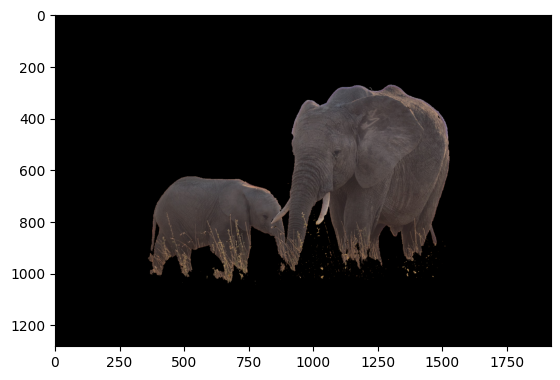

In [ ]:
result = mother | child
plt.imshow(result)

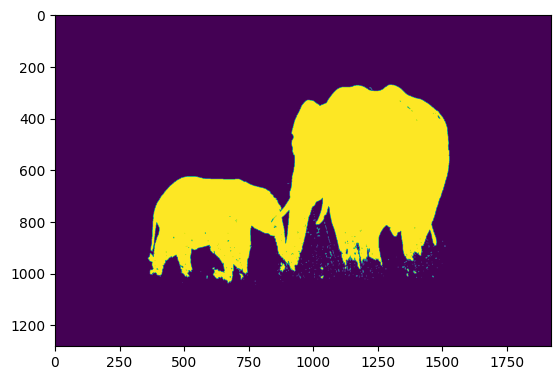

In [ ]:
combined_mask = vm1['Definite Foreground'] | vm2['Definite Foreground']
plt.imshow(combined_mask)